# OLD CAR PRICE PREDICTION

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('car_data1.csv')

In [3]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
data.shape

(549, 9)

In [6]:
data.isnull().sum()  #to find the no.of null value present in each column

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
data['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [9]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
new_data = data.drop(['Car_Name'],axis=1)

In [11]:
new_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
new_data['no_year']=2022

In [13]:
new_data['no_year']=new_data['no_year']-new_data['Year']

In [14]:
new_data['no_year']

0       8
1       9
2       5
3      11
4       8
       ..
544     7
545    10
546    14
547    10
548     9
Name: no_year, Length: 549, dtype: int64

In [15]:
new_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Data Visualization

# Checking relation between Year and Price

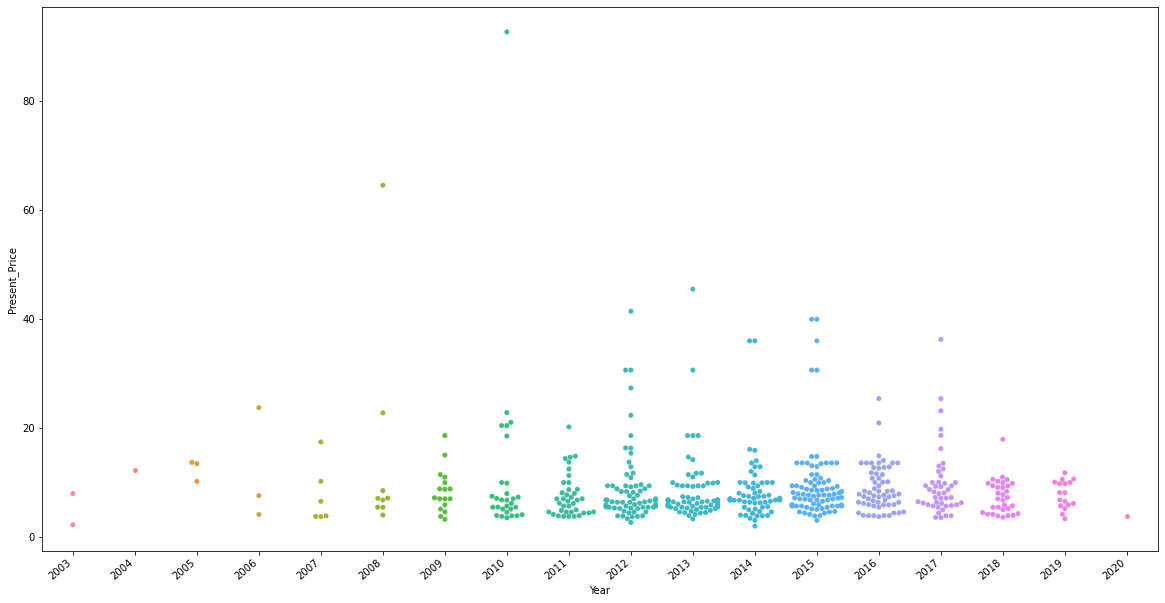

In [16]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Present_Price',data=new_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

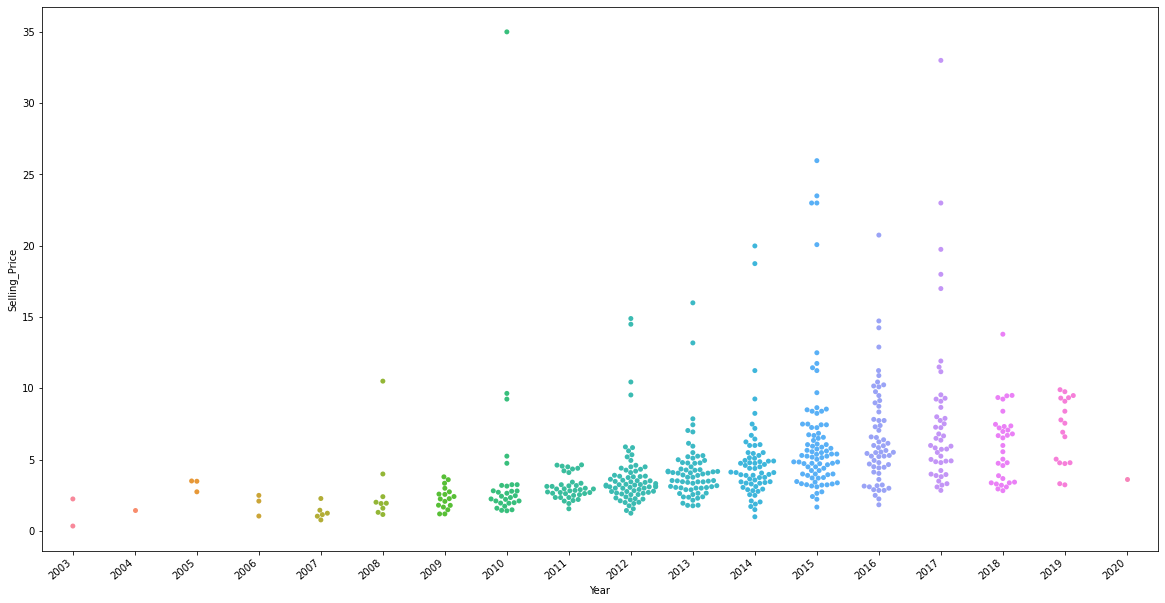

In [17]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Selling_Price',data=new_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

# Checking Relation between kms_driven with price  

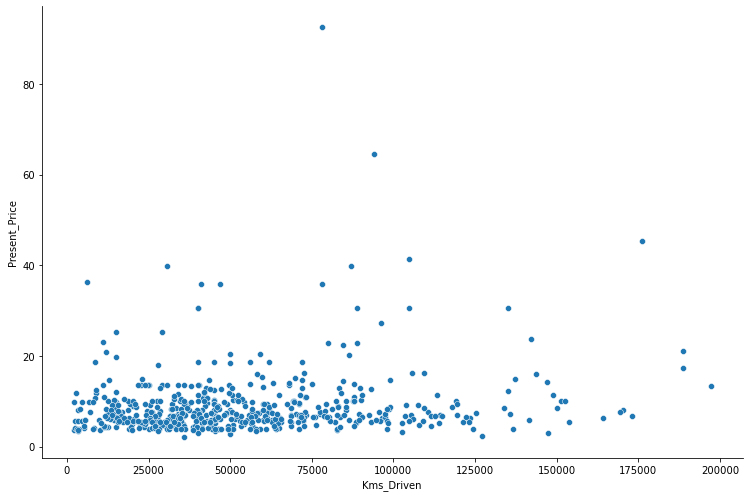

In [18]:
sns.relplot(x='Kms_Driven',y='Present_Price',data=new_data,height=7,aspect=1.5)

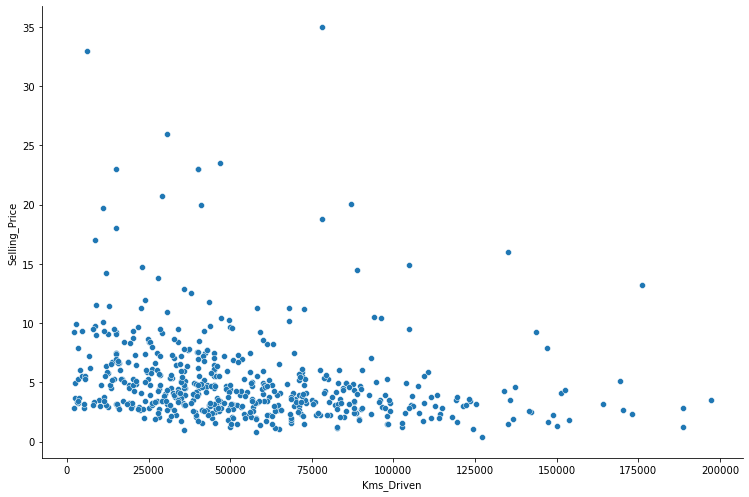

In [19]:
sns.relplot(x='Kms_Driven',y='Selling_Price',data=new_data,height=7,aspect=1.5)

# Checking relationship of Fuel Type with Price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

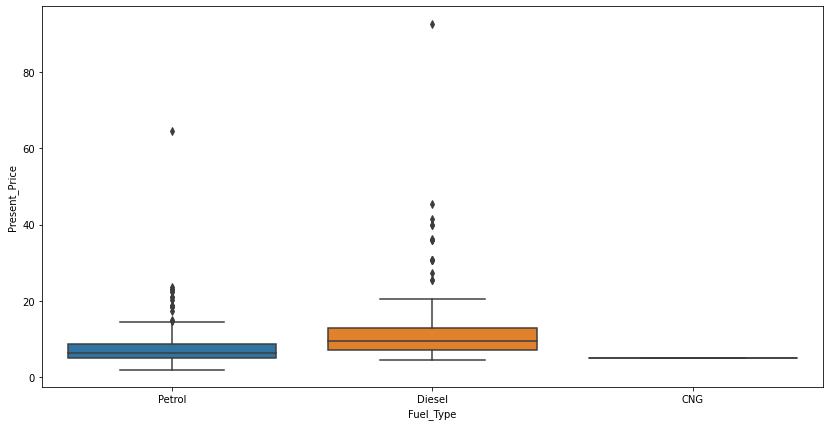

In [20]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Present_Price',data=new_data)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

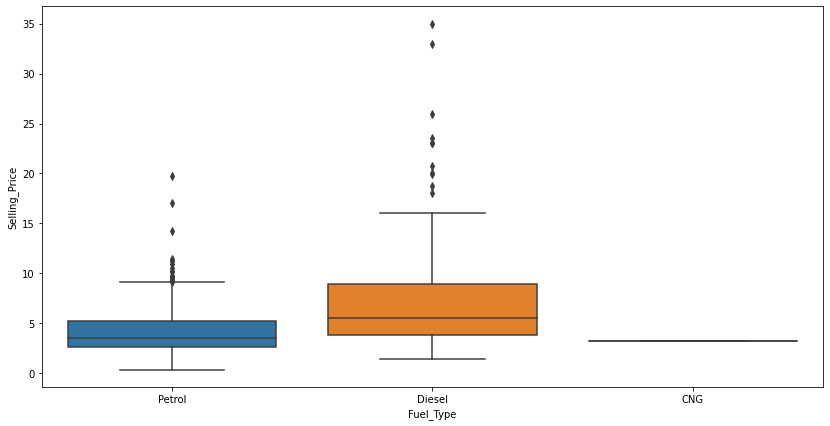

In [21]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=new_data)

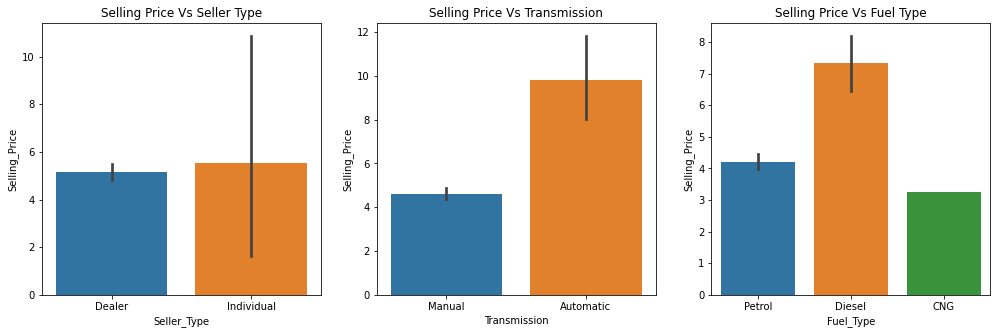

In [22]:
#Seller Type, Transmission nd Fuel Type Visualization with target variable
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(new_data['Seller_Type'], new_data['Selling_Price'])
plt.title('Selling Price Vs Seller Type')

plt.subplot(1,3,2)
sns.barplot(new_data['Transmission'],new_data['Selling_Price'])
plt.title('Selling Price Vs Transmission')

plt.subplot(1,3,3)
sns.barplot(new_data['Fuel_Type'],new_data['Selling_Price'])
plt.title('Selling Price Vs Fuel Type')

plt.show()

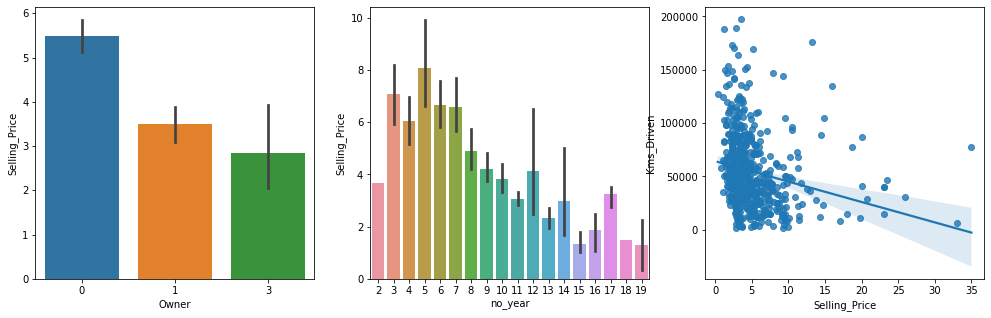

In [23]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(new_data['Owner'],new_data['Selling_Price'])

plt.subplot(1,3,2)
sns.barplot(new_data['no_year'],new_data['Selling_Price'])

plt.subplot(1,3,3)
sns.regplot(new_data['Selling_Price'],new_data['Kms_Driven'])
plt.show()

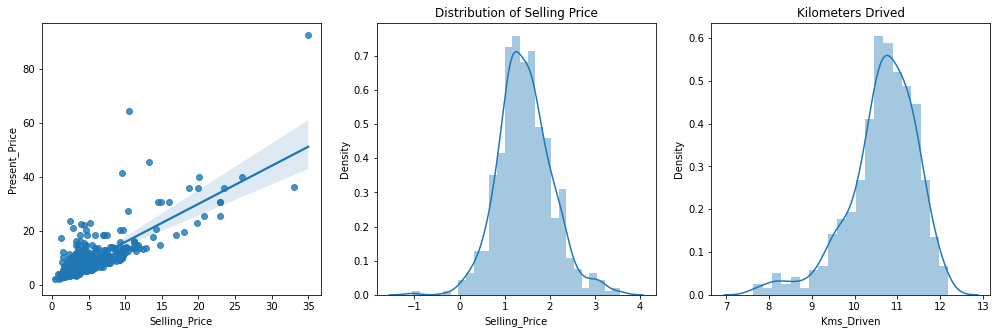

In [24]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(data['Selling_Price'],data['Present_Price'])

plt.subplot(1,3,2)
sns.distplot(np.log(data['Selling_Price']))
plt.title('Distribution of Selling Price')

plt.subplot(1,3,3)
sns.distplot(np.log(data['Kms_Driven']))
plt.title('Distribution of KMS Drived')


plt.title('Kilometers Drived')
plt.show()

In [42]:
new_data.drop('Year',axis=1,inplace=True)

In [43]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [44]:
new_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'no_year'],
      dtype='object')

In [45]:
new_data.shape

(549, 8)

In [46]:
#For converting the categorical features into one hot encoded we are using dummy here to convert inot one hot encoded.

In [47]:
new_data = pd.get_dummies(new_data,drop_first=True)  #after this the first value as column will be dropped to avoid dumy variable trap

In [48]:
new_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [49]:
new_data.shape

(549, 9)

In [50]:
#Visualize the data to determine the corelation

In [51]:
new_data

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
544,1.68,3.07,147413,0,7,0,1,0,1
545,2.67,5.49,32808,0,10,0,1,0,1
546,10.51,64.49,94020,0,14,0,1,0,0
547,3.16,6.46,75435,0,10,1,0,0,1


In [52]:
x = new_data.iloc[:,1:]   #where x are independent feature like Present_price ,kms_driven and all
y = new_data.iloc[:,0]   # where y is dependeent i.eSelling_price

In [53]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
544     1.68
545     2.67
546    10.51
547     3.16
548     4.78
Name: Selling_Price, Length: 549, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state= 0)

In [55]:
x_train.shape

(384, 8)

In [56]:
x_test.shape

(165, 8)

# Applying Regression Models

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [89]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
r18=lr.predict(x_train)
r18

array([ 0.24659652,  4.65059796,  4.31626685,  2.59749658,  0.84605696,
        3.31743636,  3.07361604,  3.98524774,  8.73409007,  5.98102683,
        2.57991821,  2.46977423,  7.36642058, 19.40590173,  1.54631507,
        7.58479574, 19.82779967,  0.0879402 ,  6.51085344,  4.09174678,
        8.22545253,  6.06707847,  6.32001403,  3.98936634,  4.01805465,
        4.38831823,  3.63005824,  5.9871918 ,  7.60120332,  3.25      ,
        7.07935426,  4.88435722,  3.16525195, 13.84831056,  5.39529334,
        3.02520638,  4.80468582,  3.17543332,  5.36449966,  5.5161687 ,
        5.39578603,  8.20176881,  3.1252201 ,  3.68097146,  9.33289904,
        4.5002104 ,  3.29770206,  2.50116442,  4.57280354,  3.46910096,
        6.52620268,  4.12964585,  5.00851453,  4.16634491,  4.01542479,
        6.69173662,  6.3994427 ,  1.61793388,  3.08094598,  4.41588582,
        6.82805675,  4.0434696 ,  7.84326155,  5.05422079, 21.51052296,
        2.59116278,  1.30614979,  4.76266898,  6.38060046,  4.01

In [91]:
y_pred=lr.predict(x_test)
y_pred

array([ 7.91582208,  1.56362434, 15.66345557,  2.52782036,  7.08930205,
       -3.01621548,  3.20351561,  7.16289571,  3.54690393,  2.94863074,
        4.50699176,  3.08689925, 14.12522993, 10.01916066,  1.86977524,
        7.27484791,  4.9246898 ,  4.19252307,  1.58279631,  3.61705123,
        2.65254542,  3.43615794,  5.9543239 ,  1.63107098,  6.27815947,
        6.51457598,  3.36938485,  4.75744327,  0.28547192,  5.92360099,
        7.73444804,  8.39057348,  8.01737821,  8.0121963 ,  5.29050261,
        4.41562689,  3.62005897,  7.22746403,  7.98844804,  1.70363025,
        3.22107022, 19.32854793,  7.98844804, 20.36050126,  4.46063929,
        4.86731421,  4.64372691,  7.93129865,  9.52539364,  5.94107706,
        4.09953309,  5.48948847,  5.39884988,  3.3285152 ,  6.29273938,
        3.89482303,  4.3623665 ,  5.88661817, -0.73551402,  5.83239069,
        4.06014702,  8.79685647,  5.89926601,  4.17775801,  8.27152609,
        2.33950071,  1.77819919,  8.9563406 ,  5.75397765,  6.80

In [94]:
A1=r2_score(y_test,y_pred)
A1


0.5545460910443019

In [95]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 1.2250640856144166


# Ridge Regression

In [62]:
from sklearn.linear_model import Ridge

In [63]:
cl = Ridge()

In [64]:
cl.fit(x_train,y_train)

Ridge()

In [65]:
r19=cl.predict(x_train)
r19

array([ 0.2504704 ,  4.65872019,  4.31443864,  2.59415842,  0.8490378 ,
        3.31152726,  3.07225822,  3.98669051,  8.74356292,  5.96516389,
        2.57515799,  2.47089144,  7.35653608, 19.40499204,  1.54709447,
        7.5974696 , 19.85365371,  0.10157278,  6.49681252,  4.09354128,
        8.22159716,  6.05844281,  6.32640059,  3.9783552 ,  4.01920414,
        4.3912698 ,  3.63587352,  5.97462312,  7.59816416,  4.12883552,
        7.08775214,  4.88777432,  3.16905859, 13.82898625,  5.3885108 ,
        3.02819091,  4.80494156,  3.18109579,  5.36720837,  5.50192518,
        5.39598033,  8.19822572,  3.11481683,  3.68027071,  9.32128921,
        4.50305048,  3.30336896,  2.50820665,  4.57196051,  3.47802255,
        6.51831681,  4.11267574,  5.02241217,  4.16700541,  4.01569619,
        6.70402136,  6.40402088,  1.62088985,  3.0860811 ,  4.41193565,
        6.81649411,  4.05308172,  7.85154358,  5.04302862, 21.50877623,
        2.5938727 ,  1.30474091,  4.74422243,  6.36825328,  4.00

In [66]:
y_tred=cl.predict(x_test)
y_tred

array([ 7.57735431,  1.56902672, 15.65119665,  2.5301494 ,  7.09561653,
       -3.36386713,  3.20292925,  7.17686512,  3.55609334,  2.95228533,
        4.51076622,  3.08327172, 14.12709816, 10.02261836,  1.86884523,
        7.27735262,  4.90199733,  4.18052211,  1.58306437,  3.61189386,
        2.64430479,  3.43637949,  5.96683255,  1.64761059,  6.26728573,
        6.51942392,  3.37172334,  4.76133875,  0.29272911,  5.92906312,
        7.74879138,  8.38105292,  8.02750422,  8.02234756,  5.29323826,
        4.41844541,  3.60857548,  7.2360109 ,  7.98091356,  1.70840704,
        3.21960098, 19.33889466,  7.98091356, 20.37102307,  4.46307496,
        4.87476743,  4.64727864,  7.91776634,  9.51558467,  5.94447603,
        4.10289525,  5.47554686,  5.39281402,  3.33152965,  6.28008964,
        3.89738699,  4.3477667 ,  5.89377905, -0.72678943,  5.82164374,
        4.06287255,  8.78958979,  5.88209172,  4.18093485,  8.28029019,
        2.34255693,  1.77734513,  8.92459264,  5.75448851,  6.80

In [67]:
A2=r2_score(y_test,y_tred)
A2

0.5544711738321466

In [96]:
print('MAE',mean_absolute_error(y_test,y_tred))

MAE 1.2251239760233803


# Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt=DecisionTreeRegressor()

In [70]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
r20=dt.predict(x_train)
r20

array([ 2.41,  5.52,  3.  ,  2.37,  1.93,  2.1 ,  2.67,  4.06, 10.11,
        3.96,  2.7 ,  3.  ,  5.21, 19.99,  2.77,  9.31, 13.19,  1.68,
        5.73,  4.07,  8.55,  3.6 ,  7.5 ,  3.35,  4.1 ,  3.9 ,  4.  ,
        5.5 ,  7.48,  3.25,  8.01,  3.81,  3.46, 18.  ,  4.9 ,  4.15,
        5.3 ,  3.51,  4.8 ,  4.6 ,  3.24,  8.25,  2.92,  3.1 ,  9.25,
        4.4 ,  4.1 ,  3.12,  3.1 ,  4.22,  8.25,  4.4 ,  4.35,  4.26,
        2.85,  7.31,  4.78,  2.25,  3.  ,  3.91,  4.2 ,  3.99,  9.48,
        3.91, 33.  ,  5.14,  1.93,  4.5 ,  4.75,  3.53,  3.16,  1.25,
        3.45,  3.52,  4.86,  5.5 ,  2.28,  3.19,  2.02,  1.42,  9.55,
        4.91,  4.64, 23.  ,  9.5 ,  6.4 ,  3.15,  3.45,  6.37,  6.5 ,
        5.15,  5.56, 23.5 ,  5.75,  4.55,  3.9 ,  3.71,  3.84, 23.  ,
        4.75,  3.43, 11.5 ,  3.75,  5.  ,  2.25,  4.84,  7.28,  1.8 ,
        7.79,  3.06,  7.25,  6.56,  5.61,  5.95,  2.6 ,  3.06,  4.5 ,
        1.74,  9.7 ,  6.7 ,  4.62,  2.5 ,  3.93, 11.25,  7.52,  3.23,
        4.73,  2.42,

In [72]:
y_red=dt.predict(x_test)
y_red

array([ 2.82,  1.93, 23.  ,  2.72,  9.25,  1.05,  2.89,  4.75,  3.9 ,
        2.82,  5.44,  2.65, 14.25, 14.73,  1.56,  3.82,  4.67,  3.84,
        2.5 ,  3.9 ,  3.01,  2.85,  6.06,  3.35,  5.98,  5.25,  3.75,
        4.4 ,  1.81,  4.75,  8.5 ,  7.28, 11.25, 11.25,  5.25,  3.9 ,
        3.93,  7.33,  7.25,  2.72,  1.89, 10.45,  7.25, 13.19,  3.96,
        5.  ,  3.5 ,  5.44,  9.35,  5.25,  5.62,  5.56,  4.67,  2.78,
        4.86,  3.06,  3.1 ,  5.29,  2.5 ,  4.72,  2.64,  6.56,  5.25,
        4.  ,  9.77,  2.35,  2.9 ,  7.79,  5.3 ,  6.  ,  2.85,  4.3 ,
        3.3 ,  3.19,  4.1 ,  2.67,  4.  ,  3.93,  6.56,  2.79,  2.85,
        5.25,  1.42,  9.32,  3.43,  6.56,  7.28,  1.2 ,  7.28,  5.75,
        2.3 , 11.5 ,  5.21,  2.12,  2.7 ,  3.22,  2.72,  3.3 ,  6.15,
        3.54,  9.25,  2.16,  3.93,  6.61,  1.2 ,  2.7 ,  5.85,  7.45,
        2.55,  4.5 ,  4.5 , 11.25, 13.19,  3.24,  2.82,  2.16,  3.95,
        3.35,  4.27,  4.78,  7.52,  2.19,  3.32,  1.8 ,  3.13,  1.2 ,
        3.43,  3.03,

In [73]:
A3=r2_score(y_test,y_red)
A3

0.8483291435869673

In [97]:
print('MAE',mean_absolute_error(y_test,y_red))

MAE 0.882


# Lasso Regression

In [74]:
from sklearn.linear_model import Lasso

In [75]:
ls=Lasso()

In [76]:
ls.fit(x_train,y_train)

Lasso()

In [77]:
r21=ls.predict(x_train)
r21

array([ 1.32773796,  4.95496929,  4.45851488,  2.9864851 ,  1.82427421,
        2.68897219,  3.60364127,  4.46604592,  9.13182053,  5.37788158,
        3.16765352,  3.00261507,  6.62486411, 18.48578667,  2.04475729,
        7.86736682, 19.27954745,  0.33869195,  5.94272913,  4.47310261,
        7.35685337,  6.38545542,  6.71348345,  3.1230362 ,  4.49720897,
        4.79056508,  3.92720214,  5.067452  ,  6.40012038,  4.16782548,
        7.30469178,  5.04611725,  3.53416722, 12.24835409,  4.50985686,
        3.48801378,  5.19570467,  4.51922519,  5.47844006,  4.56477802,
        5.27448854,  7.44164597,  2.39912621,  3.97607231,  8.10991536,
        4.90519429,  3.74596567,  2.87799801,  4.73297509,  4.21534554,
        5.56230515,  4.09157481,  5.85352915,  4.64592326,  4.16721017,
        7.04680102,  6.35323913,  2.45826775,  3.99120976,  4.4033761 ,
        6.88305817,  4.17754583,  7.98699794,  4.11585427, 20.33468231,
        1.70001547,  1.94814522,  4.51945234,  5.36989775,  3.28

In [78]:
y_ceed=ls.predict(x_test)
y_ceed

array([ 7.86570832,  2.16345697, 14.29755279,  3.28669152,  7.29541762,
       -2.81181081,  3.63883018,  8.29412689,  3.87291141,  3.52148463,
        4.92097671,  3.70241182, 13.96394114,  9.06717875,  2.36310797,
        6.81025282,  3.47414459,  3.32377058,  2.07767185,  2.68673904,
        1.97970984,  3.6742326 ,  6.45030561,  2.65677444,  5.22888514,
        6.58114376,  3.94411156,  5.13209371,  1.29334405,  5.86960488,
        8.14409784,  7.155338  ,  8.50334996,  8.49822984,  5.40219363,
        4.81754812,  2.8431517 ,  7.35286305,  6.97095034,  2.45760976,
        3.54234451, 18.89639798,  6.97095034, 19.47363674,  4.75414305,
        5.43436436,  4.74120796,  7.73501902,  8.21947972,  6.18734029,
        4.88077772,  5.10044957,  4.6268888 ,  3.58916888,  5.16987966,
        4.12145796,  3.58130578,  6.54279816, -0.13330036,  4.92451811,
        4.1301378 ,  7.70286408,  4.8269711 ,  4.57499942,  8.43427008,
        2.77979358,  2.37549387,  6.96798388,  5.86045555,  6.97

In [79]:
A4=r2_score(y_test,y_ceed)
A4

0.5270619626790116

In [99]:
print('MAE',mean_absolute_error(y_test,y_ceed))

MAE 1.2139313280693549


# Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rf=RandomForestRegressor()

In [82]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
r22=rf.predict(x_train)
r22

array([ 2.2676,  5.2173,  3.0715,  2.3851,  1.998 ,  2.5135,  2.8425,
        4.0789, 10.353 ,  4.2322,  2.8675,  2.999 ,  5.5366, 20.7624,
        2.4876,  9.0952, 16.3819,  1.8788,  5.7897,  4.0588,  8.7329,
        3.7108,  7.3027,  3.5436,  4.1609,  4.0725,  3.8777,  5.532 ,
        7.0593,  3.2268,  7.7535,  3.9314,  3.3375, 16.5193,  4.9911,
        3.8286,  5.0934,  3.2653,  4.7514,  4.4017,  3.24  ,  8.0752,
        3.0795,  3.0868,  9.0207,  4.5252,  3.9635,  3.0965,  3.1717,
        4.0558,  7.4063,  4.0093,  4.3347,  4.2879,  2.9076,  7.6642,
        4.9019,  2.2395,  3.1425,  3.7902,  4.6541,  4.1286,  9.1164,
        4.0965, 29.7634,  4.9145,  2.0431,  4.3739,  4.9533,  3.4957,
        3.3041,  1.8632,  3.8668,  3.4825,  4.6685,  5.3805,  2.1512,
        3.7847,  1.9651,  1.6308,  9.45  ,  4.8574,  4.1698, 22.9794,
        8.8105,  6.5334,  3.1023,  3.3708,  6.2304,  6.5679,  4.9098,
        5.6248, 23.3054,  5.7746,  4.4145,  3.8905,  3.9231,  3.573 ,
       22.9794,  4.8

In [84]:
y_reed=rf.predict(x_test)
y_reed

array([ 4.1726,  2.4369, 20.5742,  2.7154,  8.5347,  1.1328,  3.1385,
        4.8159,  3.8812,  3.2676,  4.7159,  2.9103, 15.9528, 12.2821,
        2.0379,  4.4738,  4.0615,  3.6349,  2.4534,  3.6786,  2.609 ,
        2.5262,  6.9505,  3.0244,  5.2782,  6.0384,  3.3806,  4.8244,
        2.1919,  4.8888,  9.4383,  7.2877, 10.2042, 10.2042,  4.8604,
        4.1923,  3.3021,  7.606 ,  7.7397,  2.6354,  2.3824, 16.7236,
        7.7397, 20.3156,  4.4816,  5.5019,  3.3401,  6.9326,  9.1858,
        5.8024,  4.1251,  4.8944,  4.2029,  3.039 ,  4.8317,  3.1477,
        3.3365,  5.1903,  2.4461,  5.4807,  2.5309,  8.0168,  5.1056,
        4.0853,  9.2816,  2.7909,  2.6552,  6.8988,  5.2336,  6.5174,
        2.3911,  4.0616,  3.3072,  4.7107,  4.4769,  2.8772,  4.9672,
        3.419 ,  7.68  ,  2.5288,  2.9823,  5.6091,  1.4913,  8.6978,
        3.4096,  6.8217,  6.3141,  1.4209,  7.1846,  5.5546,  3.2181,
       10.0465,  5.9288,  2.4495,  2.6581,  4.2538,  2.5914,  3.2918,
        5.6126,  4.9

In [85]:
A5=r2_score(y_test,y_reed)
A5

0.8716047494988788

In [100]:
print('MAE',mean_absolute_error(y_test,y_reed))

MAE 0.7027654545454549


# Tabular View of r2_scores

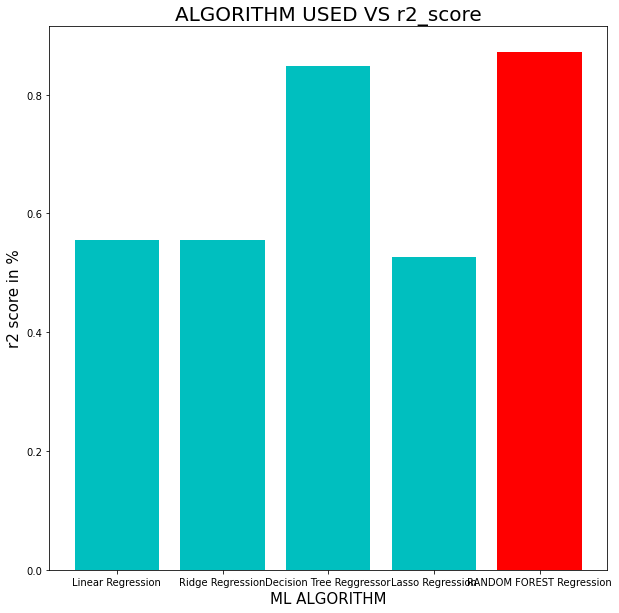

In [86]:
plt.figure(figsize=(10,10))
a=["Linear Regression", "Ridge Regression", "Decision Tree Reggressor", "Lasso Regression","RANDOM FOREST Regression"]
b=[A1,A2,A3,A4,A5]
plt.title('ALGORITHM USED VS r2_score', fontsize=20)
plt.xlabel("ML ALGORITHM", fontsize=15)
plt.bar(a,b,color=['c','c','c','c','r'])
plt.ylabel('r2 score in %', fontsize=15)
plt.show()

# Scatter Plot for Data Visualization

# Linear Regression

# Testing Data

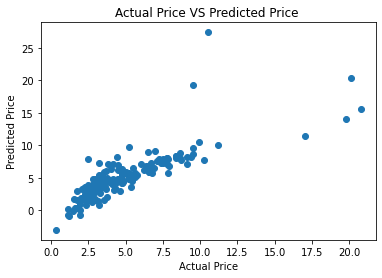

In [150]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Training Data

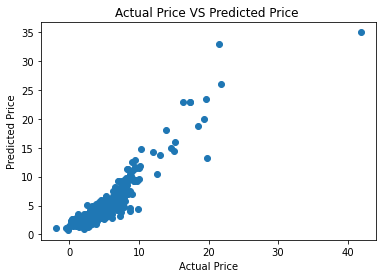

In [151]:
plt.scatter(r18,y_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Ridge Regression

# Testing Data

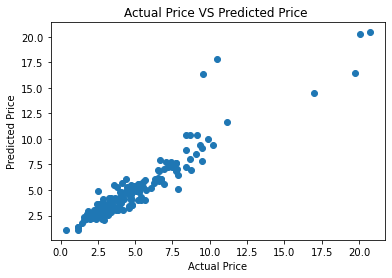

In [152]:
plt.scatter(y_test,y_reed)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Training Data

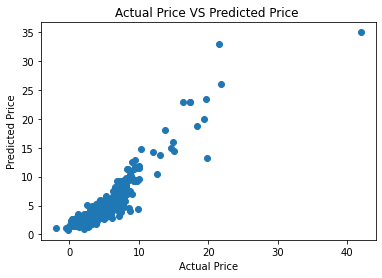

In [153]:
plt.scatter(r19,y_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Decision Tree Regressor

# Testing Data 

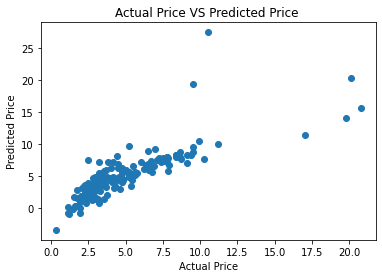

In [154]:
plt.scatter(y_test,y_tred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Training Data 

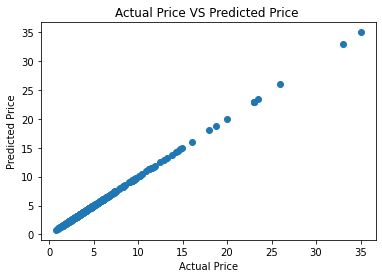

In [155]:
plt.scatter(r20,y_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Lasso Regression 

# Testing Data 

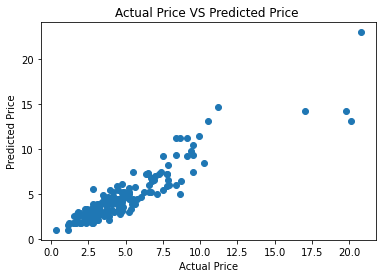

In [156]:
plt.scatter(y_test,y_red)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Traning Data

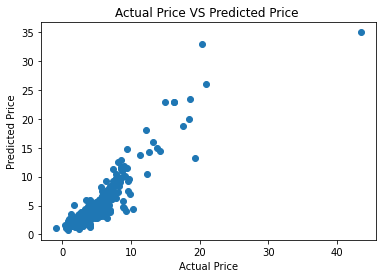

In [157]:
plt.scatter(r21,y_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Random Forest Regression

# Testing Data 

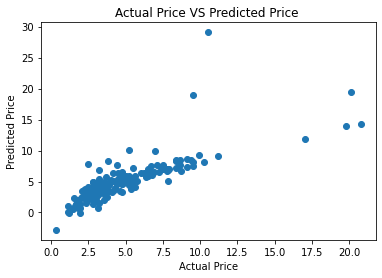

In [158]:
plt.scatter(y_test,y_ceed)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

# Traning Data 

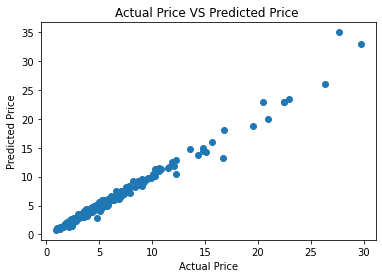

In [159]:
plt.scatter(r22,y_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price VS Predicted Price ")
plt.show()

#  Pickle File

In [160]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)